<a href="https://colab.research.google.com/github/carlosmding/PDI_SecondProject/blob/main/Descriptores_HOG_SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#Características del descriptor HOG

Los descriptores HOG (del inglés Histogram of Oriented Gradients) se basan en
la orientación del gradiente en áreas locales de una imagen. El descriptor HOG permite aprovechar de forma eficiente la información del gradiente a partir de combinar esta información en forma de histogramas orientados locales, que se calculan en celdas de pequeño tamaño, las cuales se distribuyen de forma uniforme por toda la imagen.

Dichos histogramas nos proporcionan información de las orientaciones de los contornos que dominan en cada una de las posiciones de la imagen. Esta información nos va a permitir distinguir la forma de los objetos presentes en una imagen y es una buena base para detectar y reconocer dichos objetos. Gracias a esa información, podemos ver la frontera entre un objeto y otro.

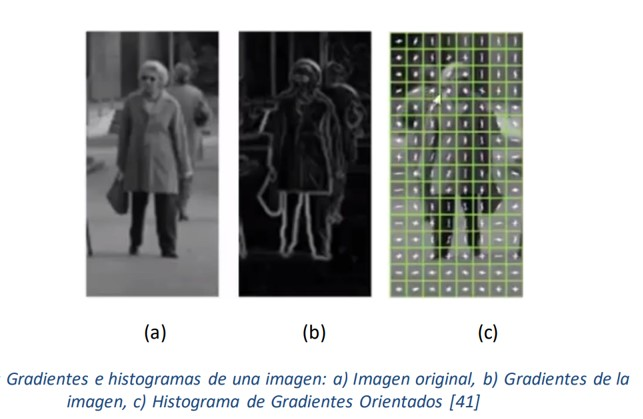

In [ ]:
grad = cv.imread("/content/gradienteHOG.jpg")
cv2_imshow(grad)

El gradiente se define como un cambio de la intensidad de la imagen en una
cierta dirección. Dicha dirección es aquella en la que el cambio de intensidad es máximo. Se calcula para cada uno de los pixeles de una imagen y queda definido para cada pixel por dos valores:
- La dirección donde el cambio de intensidad es máximo
- La magnitud del cambio en dicha dirección. 

El cálculo de estos gradientes se realiza a partir de la diferencia de intensidad de los pixeles vecinos en dirección tanto horizontal como vertical.

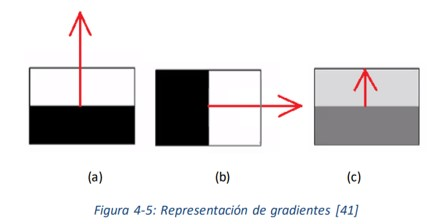

In [ ]:
grads = cv.imread("/content/gradientes.jpg")
cv2_imshow(grads)

Como se puede observar, en la primera imagen se tiene un gradiente en dirección vertical, pues es la dirección donde el cambio de intensidad es máximo (pasamos de negro a blanco). En la tercera sin embargo, se produce en la misma dirección pero su magnitud es menor, puesto que no hay tanto cambio de intensidad como en la primera (pasamos de un gris a otro con diferente valor). En la segunda imagen por su parte, se tiene un gradiente de la misma magnitud que el primero, pero con dirección horizontal, puesto que es la dirección donde hay mayor cambio de intensidad en dicha imagen. 

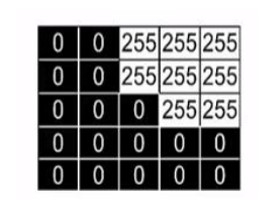

In [ ]:
ej = cv.imread("/content/ej.jpg")
cv2_imshow(ej)

###Ejemplo (Cálculo)

En la imagen se realizará el cálculo del gradiente del pixel del centro. Se debe hallar la diferencia horizontal y la diferencia vertical.

dx = (x+1,y) - (x-1, y)
dy = (x, y+1) - (x, y-1)

dx= 255 - 0 = 255
dy= 0 - 255 = -255

Calculamos la orientación y la magnitud
- Orientación: arctan (dy/dx) = arctan(-1) = -45°
- Magnitud: √(𝑑𝑥2 + 𝑑𝑦2) = 360.62

Para calcular el HOG
1. Se divide la imagen en un número fijo de celdas (6\*6 o 8\*8 pixeles) para cada de estas se obtiene un histograma de las orientaciones de los gradientes; se debe tener en cuenta el rango de las orientaciones (con o sin signo) y además los intervalos del rango (9 sub-rangos de 20°). Una vez calculados, cada uno de estos gradientes quedará asignado a uno de
los intervalos y asi se obtiene el histograma para esa celda.
2. Una vez obtenidos todos los histogramas de cada celda se combian para objeter la represtación global de toda la imagen en forma de vector de caracteristicas.

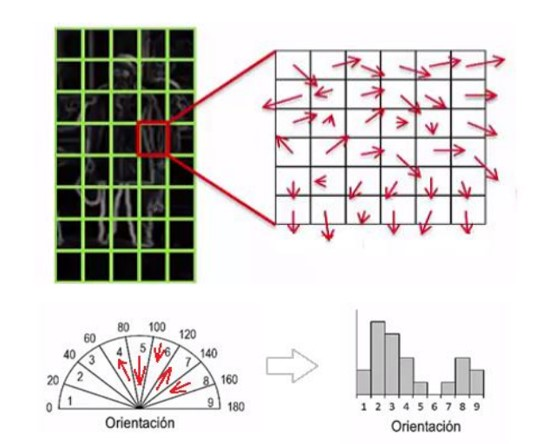

In [ ]:
gradi = cv.imread("/content/gradi.jpg")
cv2_imshow(gradi)

#Cálculando un histograma de gradientes

Matrix pixeles ([:3],[:])
[[142 154 172 168 120 217]
 [148 143 159 170 143 167]
 [170 131 159 189 199 218]]
Gx
[[  0.  30.  14. -52.  49.   0.]
 [  0.  11.  27. -16.  -3.   0.]
 [  0. -11.  58.  40.  29.   0.]]
Gy
[[  0.   0.   0.   0.   0.   0.]
 [ 28. -23. -13.  21.  79.   1.]
 [ 63. -10. -14.  46.  76.  55.]]
Ángulos
[[  0.         0.         0.       180.         0.         0.      ]
 [ 90.       295.56293  334.2872   127.29845   92.17431   90.      ]
 [ 90.       222.2825   346.42828   48.98524   69.109795  90.      ]]
 


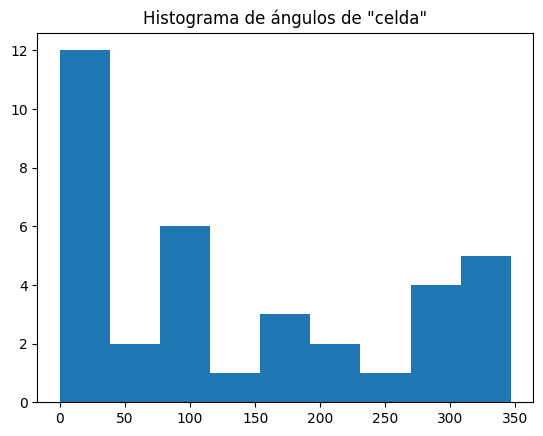

In [122]:
img = cv.imread("/content/fresa (5).jpg")
imgR = cv.resize(img, (64, 64), interpolation = cv.INTER_AREA)

celda =imgR[15:21,15:21]
gray = cv.cvtColor(celda, cv.COLOR_BGR2GRAY)

# Calculate gradient
gx = cv.Sobel(gray, cv.CV_32F, 1, 0, ksize=1)
gy = cv.Sobel(gray, cv.CV_32F, 0, 1, ksize=1)

# Python Calculate gradient magnitude and direction ( in degrees )
mag, angles = cv.cartToPolar(gx, gy, angleInDegrees=True)

print("Matrix pixeles ([:3],[:])")
print(gray[:3])
print("Gx")
print(gx[:3])
print("Gy")
print(gy[:3])
print("Ángulos")
print(angles[:3])

magnitudes=mag.flatten().tolist()
ang=angles.flatten().tolist()

print(" ")
plt.hist(ang,bins = 9) 
plt.title("Histograma de ángulos de \"celda\"")
plt.show()


#Características del Método SIFT

SIFT (Scale-invariant feature transform), o transformación de característica en
escala invariable, es un algoritmo que comparando valores de pixeles encuentra coincidencias entre pares de puntos pertenecientes a diferentes fotografías, de
manera que estos pueden ser utilizados como guía para el empalmado de las
imágenes y su transformación en panoramas.  

Primero debemos tener en cuenta la escala de la imagen, por lo que se utilizan tres parámetros (x, y, σ), ‘x’ e ‘y’ representan un punto en el espacio donde puede encontrarse un punto clave potencial y ‘σ’ la escala a la que se encuentra. Estos valores se buscan mediante diferencia de gaussianas.
Una vez encontrados estos puntos clave deben ser refinados para obtener resultados mas precisos. Utilizando la expansión del espacio de escala de la serie de Taylor para obtener una ubicación más precisa de los extremos eliminando los puntos clave de bajo contraste y los puntos clave pertenecientes a bordes quedando únicamente los puntos clave en los que estamos interesados.

Posteriormente se asigna una orientación a cada punto clave para lograr la invarianza a la rotación en la imagen. Se toma un vecindario alrededor del punto clave dependiendo de la escala, la magnitud y la dirección del gradiente.
Por último, se crea un el descriptor del punto clave. Se toma un vecindario de 16 x 16 alrededor del punto dividiéndose en varios sub-bloques dando al final como resultado 128 valores bin.

El proceso del SIFT requiere contrucción de pirámides de escala/espacio y detección de extremos, localización de puntos claves, asignación de la orientación y descripción de puntos claves.

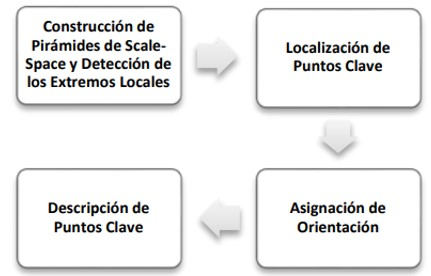

In [91]:
sift = cv.imread("/content/Sift.jpg")
cv2_imshow(sift)

Extracción de puntos claves

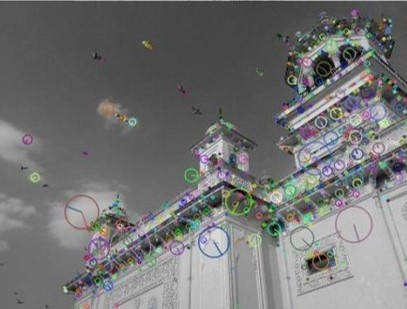

In [100]:
punto_clave = cv.imread("/content/puntosClaves.jpg")
cv2_imshow(punto_clave)

## Ejemplo - Puntos clave

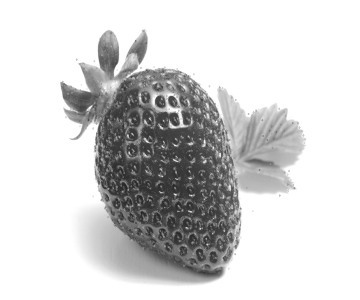

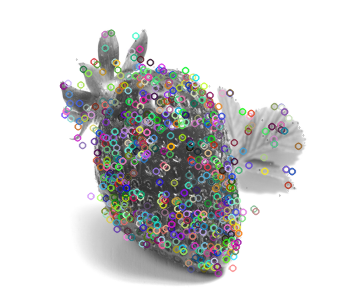

In [127]:
imgR = cv.resize(img, (360, 300), interpolation = cv.INTER_AREA)
gray= cv.cvtColor(imgR,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img_pto=cv.drawKeypoints(gray,kp,img)

cv2_imshow(gray)
cv2_imshow(img_pto)

## Ejemplo - Matches

Detección de puntos claves y comparación en una imagen y su rotación de 90º usando openCV


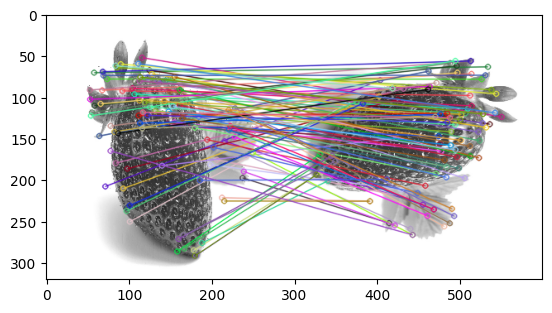

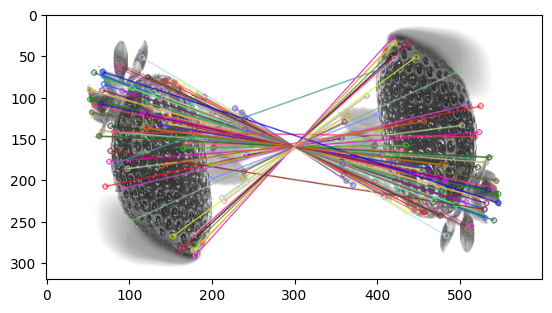

(<matplotlib.image.AxesImage at 0x7f4859ec0d00>, None)

In [130]:
img = cv.resize(img, (300,320))
img2 = cv.imread("/content/fresa (5)_rotada.jpg")
img2 = cv.resize(img2, (300,320))

img3 = cv.imread("/content/fresa (5)_reves.jpg")
img3 = cv.resize(img3, (300,320))

im_g = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
im_g2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
im_g3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv.SIFT_create()

# detect and compute the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(im_g,None)
kp2, des2 = sift.detectAndCompute(im_g2,None)
kp3, des3 = sift.detectAndCompute(im_g3,None)

# create BFMatcher object
bf = cv.BFMatcher()

# Match descriptors.
matches12 = bf.match(des1,des2)
matches13 = bf.match(des1,des3)

# sort the matches based on distance
matches12 = sorted(matches12, key=lambda val: val.distance)
matches13 = sorted(matches13, key=lambda val: val.distance)

# Draw first 100 matches.
out = cv.drawMatches(im_g, kp1, im_g2, kp2, matches12[:100], None, flags=2)
plt.imshow(out), plt.show()

out = cv.drawMatches(im_g, kp1, im_g3, kp3, matches13[:100], None, flags=2)
plt.imshow(out), plt.show()
